In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


# ML and data libraries
import numpy as np
import scipy as sp
from scipy import signal
import scipy.stats as st
import pandas as pd
import sklearn

#image processing
from PIL import Image
import PIL
from skimage import data, io, filters

# System libraries
import pickle 

#import sys
#sys.path.append('../../util/')




In [3]:
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

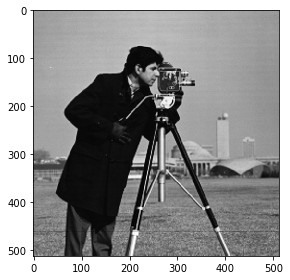

In [9]:
img = data.camera()
io.imshow(img)
io.show()


/Users/markeas1/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


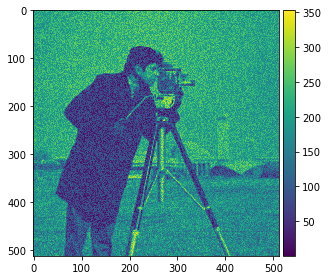

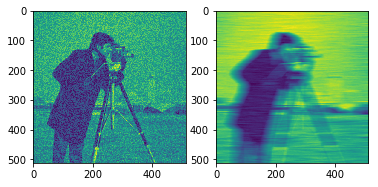

In [10]:
# Kernel Sizes
k_size = 50

# motion blur kernel
k = np.zeros((k_size, k_size))
k[int((k_size-1)/2), :] = np.ones(k_size)
k = k / k_size


# Noisy image
noise = np.random.random(img.shape)*100
img_noise = img + noise
io.imshow(img_noise)
io.show()

# Noisy and motion blurred image
img_noise_b = signal.convolve2d(img_noise, k, boundary = 'symm', mode = 'same')




#plotting
plt.subplot(1,2,1)
plt.imshow(img_noise)

plt.subplot(1,2,2)
plt.imshow(img_noise_b)

In [14]:
y = img_noise_b
img_guess = np.copy(y)
x_hat = img_guess
h_hat = np.random.rand(k_size,k_size)

In [13]:
for i in range(0,10):
    x_hat = x_hat

SyntaxError: invalid syntax (<ipython-input-13-55737f1467d9>, line 2)

In [24]:
a = np.array([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])
print(a)
print(b)
print(' \n')
print(np.matmul(a,b))
print(a.shape)
print(type(a))

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
 

[[ 7 10]
 [15 22]]
(2, 2)
<class 'numpy.ndarray'>


In [38]:
a = np.fft.fft2(k)
print(k.shape)

(50, 50)


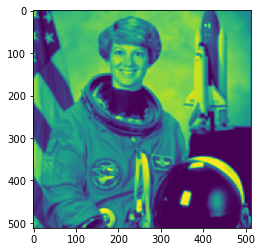

In [32]:
from skimage import color, data, restoration
img = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
img = convolve2d(img, psf, 'same')
plt.imshow(img)
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 1100)

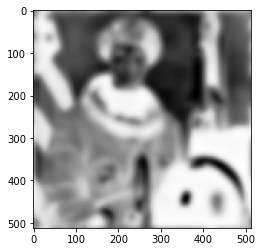

In [31]:
plt.imshow(deconvolved_img, cmap = 'Greys')